In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/painting_VS_photo/

/gdrive/MyDrive/painting_VS_photo


In [4]:
ls

test/  train/  valid/


In [5]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
import keras as k
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [6]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [7]:
train_generator = train_datagen.flow_from_directory(
    '/gdrive/MyDrive/painting_VS_photo/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 5960 images belonging to 3 classes.


In [8]:
test_generator = train_datagen.flow_from_directory(
     '/gdrive/MyDrive/painting_VS_photo/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 2553 images belonging to 3 classes.


Found 8513 files belonging to 3 classes.


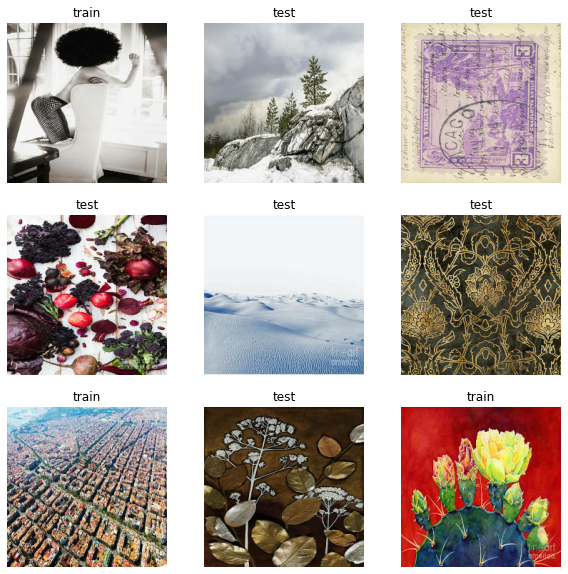

In [9]:
train_dataset = image_dataset_from_directory('/gdrive/MyDrive/painting_VS_photo/',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [19]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [20]:
inception = InceptionV3(input_tensor=k.Input(shape=(224,224,3)),
            weights='imagenet',
            include_top=False,
            )

for models in inception.layers[:-1]:
      models.trainable= False
model = k.models.Sequential()
model.add(inception)
model.add(k.layers.Flatten())
model.add(k.layers.Dense(4, activation='softmax'))
print(model.summary())

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 4)                 204804    
                                                                 
Total params: 22,007,588
Trainable params: 204,804
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [24]:
model.compile(optimizer="adam", loss=k.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [22]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [26]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 15) 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
187/187 [==============================] - 990s 5s/step - loss: 4.9420 - accuracy: 0.3911 - val_loss: 4.6948 - val_accuracy: 0.3608
Epoch 2/15
187/187 [==============================] - 1005s 5s/step - loss: 4.5870 - accuracy: 0.4067 - val_loss: 4.9484 - val_accuracy: 0.3349
Epoch 3/15
187/187 [==============================] - 1000s 5s/step - loss: 4.7165 - accuracy: 0.4030 - val_loss: 5.7255 - val_accuracy: 0.3333
Epoch 4/15
187/187 [==============================] - 999s 5s/step - loss: 4.5895 - accuracy: 0.4094 - val_loss: 5.7719 - val_accuracy: 0.3286
Epoch 5/15
187/187 [==============================] - 996s 5s/step - loss: 5.2304 - accuracy: 0.4039 - val_loss: 5.1431 - val_accuracy: 0.3290
Epoch 6/15
187/187 [==============================] - 1021s 5s/step - loss: 4.7285 - accuracy: 0.4138 - val_loss: 4.8749 - val_accuracy: 0.3184


In [ ]:
model.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


19/80 [======>.......................] - ETA: 3:49 - loss: 4.7802 - accuracy: 0.3158

In [28]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)
  
    if i == test_generator.samples // 32 + 1:
        break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


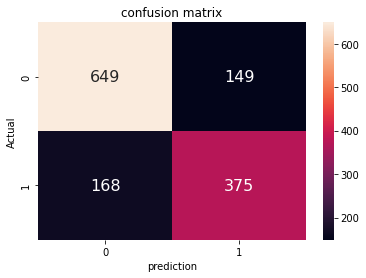

In [ ]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [ ]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       798
         1.0       0.72      0.69      0.70       543

    accuracy                           0.76      1341
   macro avg       0.76      0.75      0.75      1341
weighted avg       0.76      0.76      0.76      1341



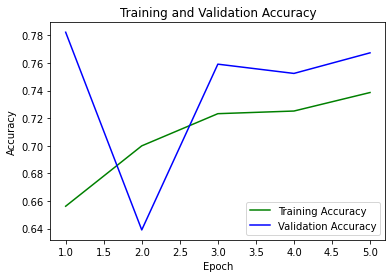

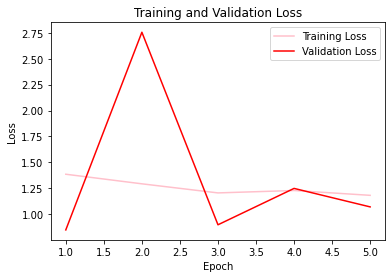

In [ ]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save('painting_VS_photo_inceptionV3.h5')